In [6]:
#access x_hh folder 
import sys
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv



In [7]:
folder = '../data/priceshocks/down_x_hh/'
df0 = pd.read_csv(f"{folder}/household_296_hh.csv")
df_CPI = pd.read_csv("../data/priceshocks/down_priceshock.csv")

#create two sorted df based on all_I and all_w
df0_I = df0.sort_values(by=['all_I'])
df0_w = df0.sort_values(by=['all_W'])
#just pic the CPI column of the df_CPI but only rows 296 to 399
df_CPI = df_CPI.iloc[296:550, 1]
#print(df_CPI)
#print(df0_I,df0_w)
#safe id of each percentile in a list 
id_I = df0_I['hh_id'].tolist()
id_w = df0_w['hh_id'].tolist()
percentiles_I = []
percentiles_W = []
num_slices = 3

slice_size = len(id_I) // num_slices 


for i in range(num_slices):
    start_idx = i * slice_size
    end_idx = (i + 1) * slice_size
    percentiles_I.append(id_I[start_idx:end_idx])
    percentiles_W.append(id_w[start_idx:end_idx])

#print(percentiles_I)
# Initialize dictionaries to store the average of all_I and all_W for each percentile
avg_all_I = {f'Percentile_{i+1}': [] for i in range(num_slices)}
avg_all_W = {f'Percentile_{i+1}': [] for i in range(num_slices)}
#print dimensions of avg_all_I and avg_all_W
#print(len(avg_all_I))

# Loop through each csv file in the x_hh folder
for csv_file in sorted(glob.glob(f"{folder}/household_*_hh.csv")):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    #return the number * in the name from csv_file
    num = int(os.path.basename(csv_file).split('_')[1])


    
    p_value_I = []
    p_value_w = []

    # Calculate the average all_I and all_W for each percentile
    for i, (p_I, p_W) in enumerate(zip(percentiles_I, percentiles_W)):

        avg_I = df[df['hh_id'].isin(p_I)]['all_I'].mean()
        avg_W = df[df['hh_id'].isin(p_W)]['all_W'].mean()

        #rescape both values with CPI by dividing them by CPI[num]
        avg_I = avg_I / df_CPI[num]
        avg_W = avg_W / df_CPI[num]
    

        # Append the averages to the respective percentile keys in the dictionaries
        percentile_key = f'Percentile_{i+1}'
        avg_all_I[percentile_key].append(avg_I)
        avg_all_W[percentile_key].append(avg_W)


# Convert the dictionaries to DataFrames
df_avg_all_I = pd.DataFrame.from_dict(avg_all_I, orient='index').transpose()
df_avg_all_W = pd.DataFrame.from_dict(avg_all_W, orient='index').transpose()

#print(df_avg_all_I,df_avg_all_W)
# Save the DataFrames to CSV files
df_avg_all_I.to_csv(f"{folder}/avg_all_I.csv", index=False)
df_avg_all_W.to_csv(f"{folder}/avg_all_W.csv", index=False)



In [8]:
folder = '../data/priceshocks/up_x_hh/'
df0 = pd.read_csv(f"{folder}/household_296_hh.csv")
df_CPI = pd.read_csv("../data/priceshocks/up_priceshock.csv")

#create two sorted df based on all_I and all_w
df0_I = df0.sort_values(by=['all_I'])
df0_w = df0.sort_values(by=['all_W'])
#just pic the CPI column of the df_CPI but only rows 296 to 399
df_CPI = df_CPI.iloc[296:550, 1]
#print(df_CPI)
#print(df0_I,df0_w)
#safe id of each percentile in a list 
id_I = df0_I['hh_id'].tolist()
id_w = df0_w['hh_id'].tolist()
percentiles_I = []
percentiles_W = []
num_slices = 3

slice_size = len(id_I) // num_slices 


for i in range(num_slices):
    start_idx = i * slice_size
    end_idx = (i + 1) * slice_size
    percentiles_I.append(id_I[start_idx:end_idx])
    percentiles_W.append(id_w[start_idx:end_idx])

#print(percentiles_I)
# Initialize dictionaries to store the average of all_I and all_W for each percentile
avg_all_I = {f'Percentile_{i+1}': [] for i in range(num_slices)}
avg_all_W = {f'Percentile_{i+1}': [] for i in range(num_slices)}
#print dimensions of avg_all_I and avg_all_W
#print(len(avg_all_I))

# Loop through each csv file in the x_hh folder
for csv_file in sorted(glob.glob(f"{folder}/household_*_hh.csv")):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    #return the number * in the name from csv_file
    num = int(os.path.basename(csv_file).split('_')[1])


    
    p_value_I = []
    p_value_w = []

    # Calculate the average all_I and all_W for each percentile
    for i, (p_I, p_W) in enumerate(zip(percentiles_I, percentiles_W)):

        avg_I = df[df['hh_id'].isin(p_I)]['all_I'].mean()
        avg_W = df[df['hh_id'].isin(p_W)]['all_W'].mean()

        #rescape both values with CPI by dividing them by CPI[num]
        avg_I = avg_I / df_CPI[num]
        avg_W = avg_W / df_CPI[num]
    

        # Append the averages to the respective percentile keys in the dictionaries
        percentile_key = f'Percentile_{i+1}'
        avg_all_I[percentile_key].append(avg_I)
        avg_all_W[percentile_key].append(avg_W)


# Convert the dictionaries to DataFrames
df_avg_all_I = pd.DataFrame.from_dict(avg_all_I, orient='index').transpose()
df_avg_all_W = pd.DataFrame.from_dict(avg_all_W, orient='index').transpose()

#print(df_avg_all_I,df_avg_all_W)
# Save the DataFrames to CSV files
df_avg_all_I.to_csv(f"{folder}/avg_all_I.csv", index=False)
df_avg_all_W.to_csv(f"{folder}/avg_all_W.csv", index=False)



In [9]:
folder = '../data/priceshocks/no_x_hh/'
df0 = pd.read_csv(f"{folder}/household_296_hh.csv")
df_CPI = pd.read_csv("../data/priceshocks/no_priceshock.csv")

#create two sorted df based on all_I and all_w
df0_I = df0.sort_values(by=['all_I'])
df0_w = df0.sort_values(by=['all_W'])
#just pic the CPI column of the df_CPI but only rows 296 to 399
df_CPI = df_CPI.iloc[296:550, 1]
#print(df_CPI)
#print(df0_I,df0_w)
#safe id of each percentile in a list 
id_I = df0_I['hh_id'].tolist()
id_w = df0_w['hh_id'].tolist()
percentiles_I = []
percentiles_W = []
num_slices = 3

slice_size = len(id_I) // num_slices 


for i in range(num_slices):
    start_idx = i * slice_size
    end_idx = (i + 1) * slice_size
    percentiles_I.append(id_I[start_idx:end_idx])
    percentiles_W.append(id_w[start_idx:end_idx])

#print(percentiles_I)
# Initialize dictionaries to store the average of all_I and all_W for each percentile
avg_all_I = {f'Percentile_{i+1}': [] for i in range(num_slices)}
avg_all_W = {f'Percentile_{i+1}': [] for i in range(num_slices)}
#print dimensions of avg_all_I and avg_all_W
#print(len(avg_all_I))

# Loop through each csv file in the x_hh folder
for csv_file in sorted(glob.glob(f"{folder}/household_*_hh.csv")):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    #return the number * in the name from csv_file
    num = int(os.path.basename(csv_file).split('_')[1])


    
    p_value_I = []
    p_value_w = []

    # Calculate the average all_I and all_W for each percentile
    for i, (p_I, p_W) in enumerate(zip(percentiles_I, percentiles_W)):

        avg_I = df[df['hh_id'].isin(p_I)]['all_I'].mean()
        avg_W = df[df['hh_id'].isin(p_W)]['all_W'].mean()

        #rescape both values with CPI by dividing them by CPI[num]
        avg_I = avg_I / df_CPI[num]
        avg_W = avg_W / df_CPI[num]
    

        # Append the averages to the respective percentile keys in the dictionaries
        percentile_key = f'Percentile_{i+1}'
        avg_all_I[percentile_key].append(avg_I)
        avg_all_W[percentile_key].append(avg_W)


# Convert the dictionaries to DataFrames
df_avg_all_I = pd.DataFrame.from_dict(avg_all_I, orient='index').transpose()
df_avg_all_W = pd.DataFrame.from_dict(avg_all_W, orient='index').transpose()

#print(df_avg_all_I,df_avg_all_W)
# Save the DataFrames to CSV files
df_avg_all_I.to_csv(f"{folder}/avg_all_I.csv", index=False)
df_avg_all_W.to_csv(f"{folder}/avg_all_W.csv", index=False)



## Run price/taxation shock experiments

The cells below provide the code to replicate the results in the paper. However the user needs to run multiple runs with varying price/taxation shocks and save them in adequate folders in order to run the code below. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

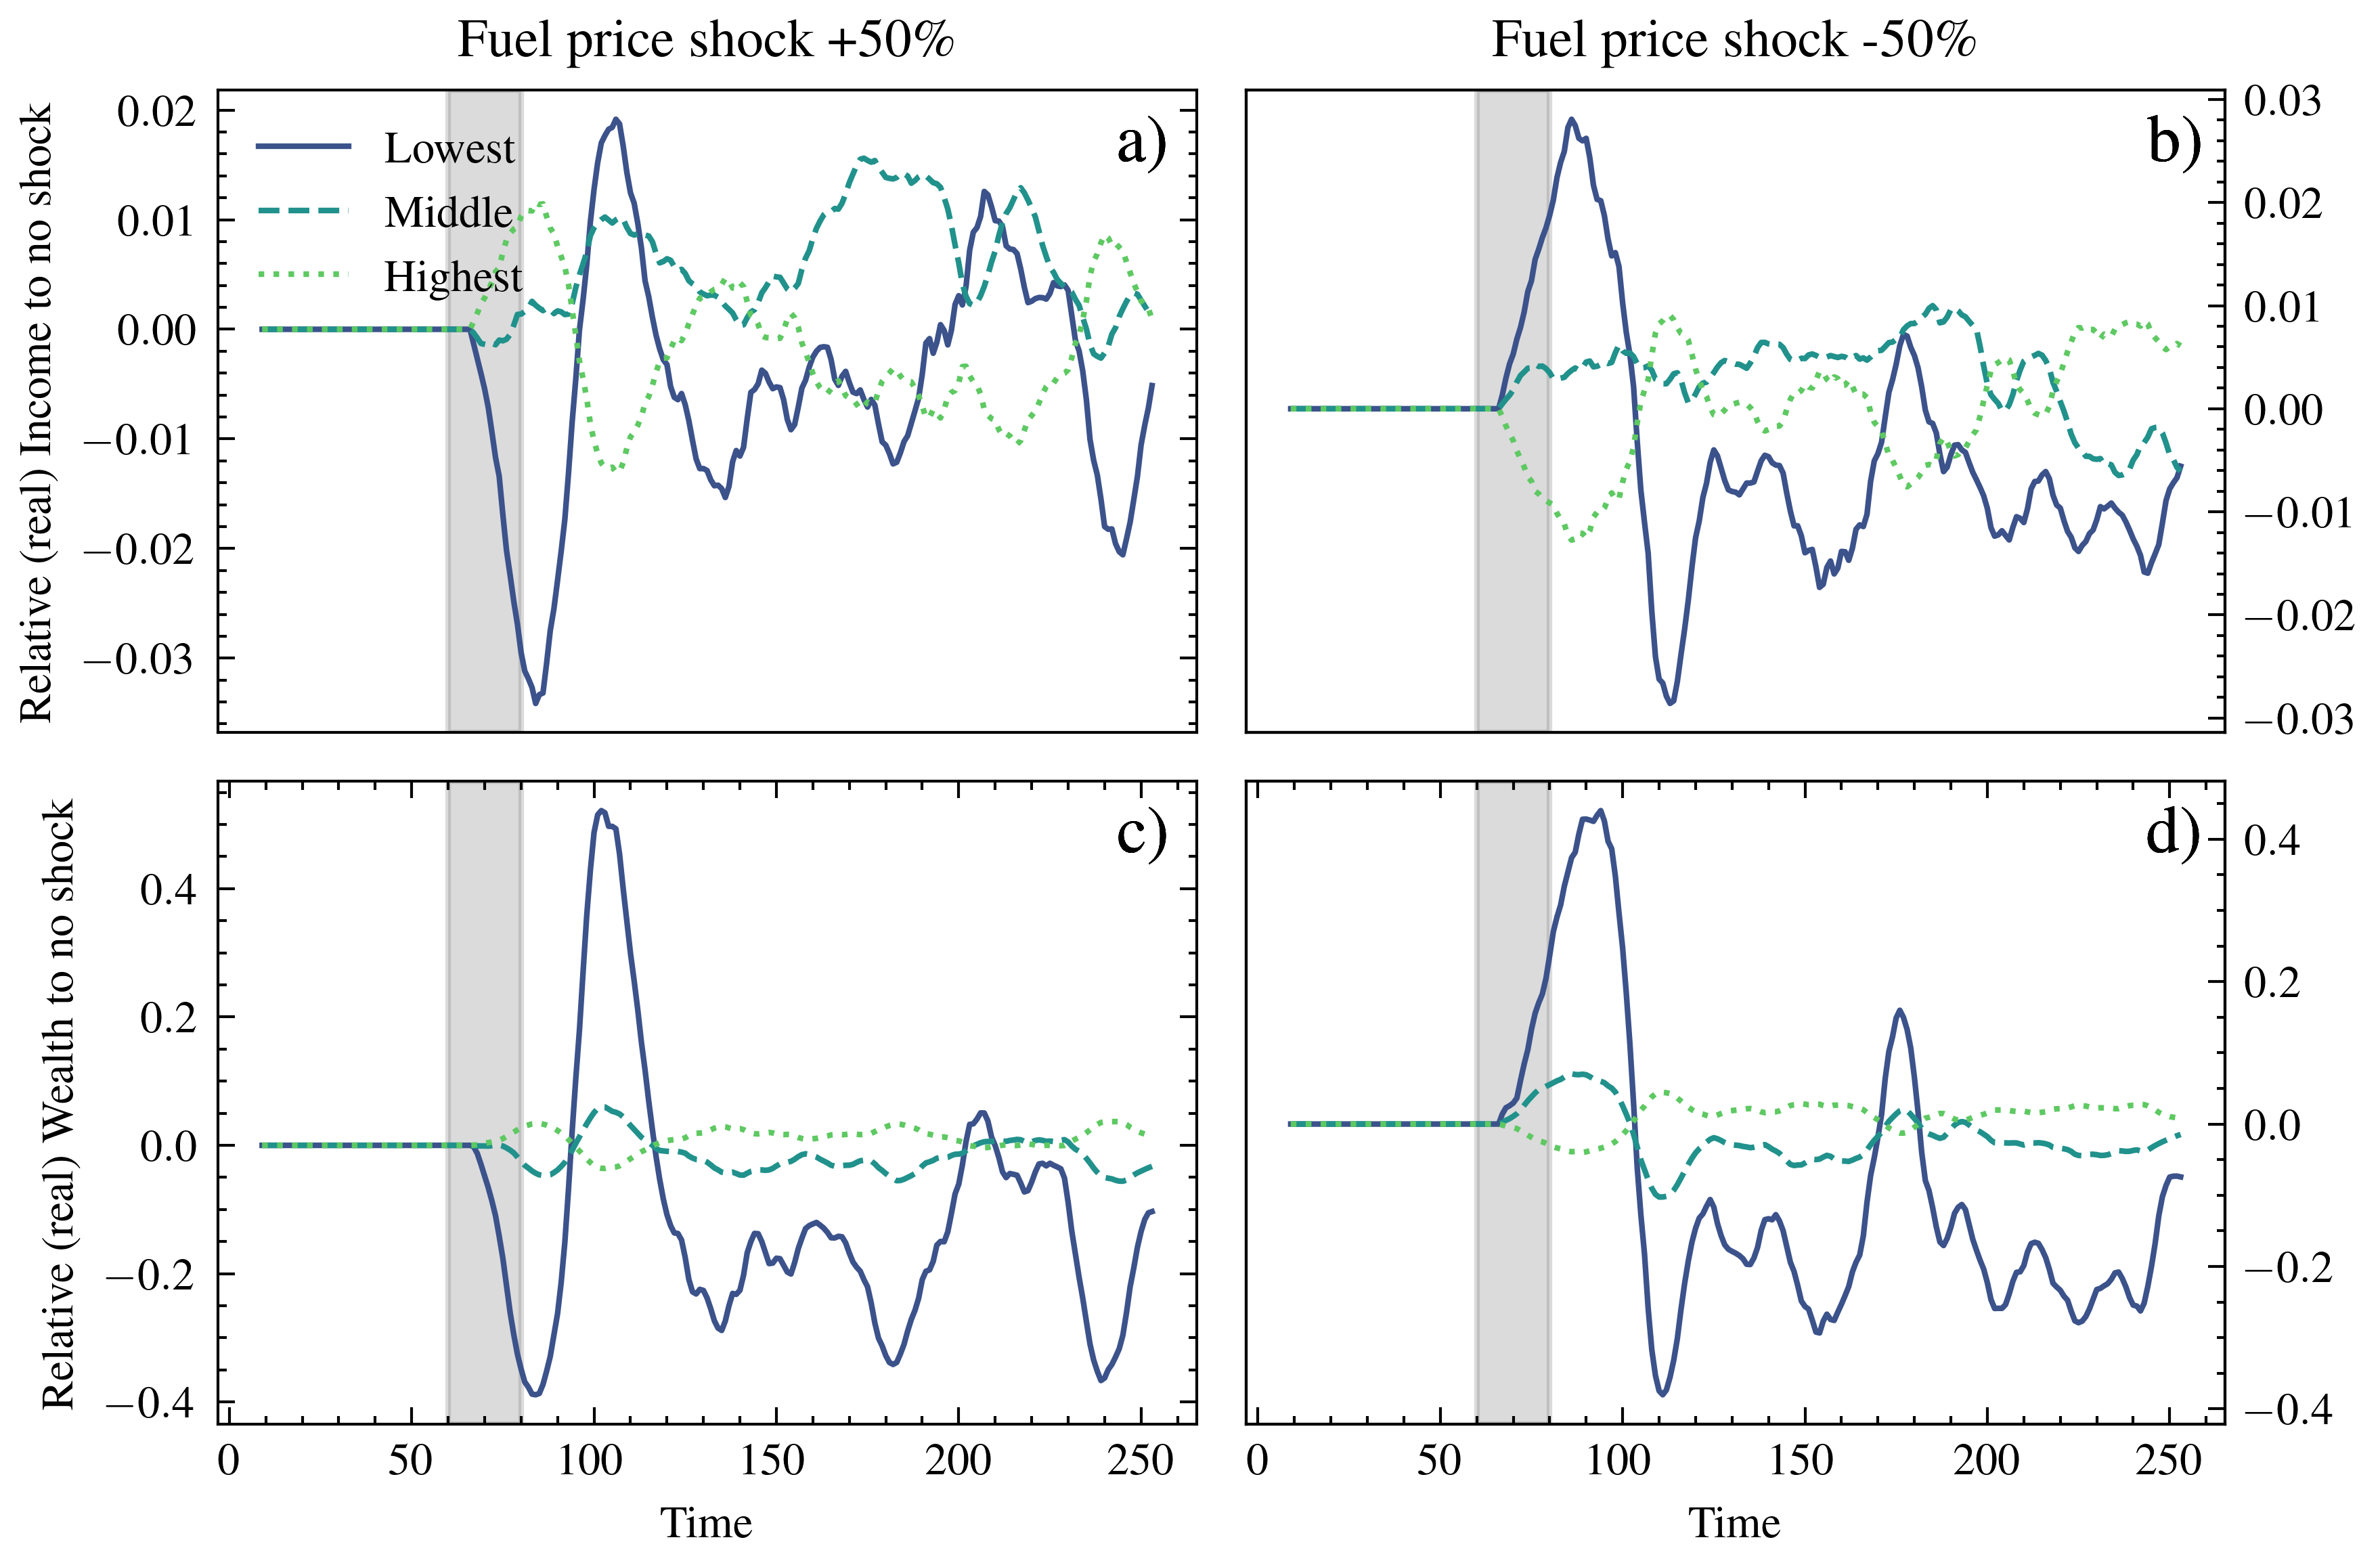

In [10]:
#import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import glob
import math
import scienceplots
from matplotlib.pyplot import get_cmap
vmap = get_cmap('viridis')

def get_percentile_group(col_name):
    # Extract the last string (assuming it's a number) from the column name
    percentile_str = col_name.split("_")[-1]  # Adjust based on your column naming convention
    try:
        percentile = int(percentile_str)
    except ValueError:
        # Handle cases where the conversion to int might fail
        print(f"Could not convert {percentile_str} to an integer.")
        return "Unknown Group"

    # Assigning labels based on the percentile value
    if percentile <= 1:
        return "Lowest "
    elif percentile <= 2:
        return "Middle "
    else:
        return "Highest "

smooth = True
window_size = 10
plt.style.use(['science', 'ieee'])

df_avg_all_I0 = pd.read_csv("../data/priceshocks/no_x_hh/avg_all_I.csv")
df_avg_all_W0 = pd.read_csv("../data/priceshocks/no_x_hh/avg_all_W.csv")
df_avg_all_I_plus = pd.read_csv("../data/priceshocks/up_x_hh/avg_all_I.csv")
df_avg_all_W_plus = pd.read_csv("../data/priceshocks/up_x_hh/avg_all_W.csv")
df_avg_all_I_minus = pd.read_csv("../data/priceshocks/down_x_hh/avg_all_I.csv")
df_avg_all_W_minus = pd.read_csv("../data/priceshocks/down_x_hh/avg_all_W.csv")

#compute the share of overall income and wealth for each percentile
#for this compute the sum of each row and divide each row by the sum of the row
df_avg_all_I_plus['sum'] = df_avg_all_I_plus.sum(axis=1)
df_avg_all_W_plus['sum'] = df_avg_all_W_plus.sum(axis=1)
df_avg_all_I_minus['sum'] = df_avg_all_I_minus.sum(axis=1)
df_avg_all_W_minus['sum'] = df_avg_all_W_minus.sum(axis=1)
df_avg_all_I0['sum'] = df_avg_all_I0.sum(axis=1)
df_avg_all_W0['sum'] = df_avg_all_W0.sum(axis=1)

df_avg_all_I_plus = df_avg_all_I_plus.div(df_avg_all_I_plus['sum'], axis=0)
df_avg_all_W_plus = df_avg_all_W_plus.div(df_avg_all_W_plus['sum'], axis=0)
df_avg_all_I_minus = df_avg_all_I_minus.div(df_avg_all_I_minus['sum'], axis=0)
df_avg_all_W_minus = df_avg_all_W_minus.div(df_avg_all_W_minus['sum'], axis=0)
df_avg_all_I0 = df_avg_all_I0.div(df_avg_all_I0['sum'], axis=0)
df_avg_all_W0 = df_avg_all_W0.div(df_avg_all_W0['sum'], axis=0)

#drop the sum column
df_avg_all_I_plus = df_avg_all_I_plus.drop(columns=['sum'])
df_avg_all_W_plus = df_avg_all_W_plus.drop(columns=['sum'])
df_avg_all_I_minus = df_avg_all_I_minus.drop(columns=['sum'])
df_avg_all_W_minus = df_avg_all_W_minus.drop(columns=['sum'])
df_avg_all_I0 = df_avg_all_I0.drop(columns=['sum'])
df_avg_all_W0 = df_avg_all_W0.drop(columns=['sum'])




#divide each column in df_avg_all_I_plus by the corresponding column in df_avg_all_I0
df_avg_all_I_plus = df_avg_all_I_plus.div(df_avg_all_I0)-1
df_avg_all_W_plus = df_avg_all_W_plus.div(df_avg_all_W0)-1
df_avg_all_I_minus = df_avg_all_I_minus.div(df_avg_all_I0)-1
df_avg_all_W_minus = df_avg_all_W_minus.div(df_avg_all_W0)-1

# Smoothing if needed
if smooth:
    df_avg_all_I_plus = df_avg_all_I_plus.rolling(window=window_size).mean()
    df_avg_all_I_minus = df_avg_all_I_minus.rolling(window=window_size).mean()
    df_avg_all_W_plus = df_avg_all_W_plus.rolling(window=window_size).mean()
    df_avg_all_W_minus = df_avg_all_W_minus.rolling(window=window_size).mean()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 4))

axes_right_top = axes[0, 1].twinx()
axes_right_bottom = axes[1, 1].twinx()

for col in df_avg_all_I_plus.columns:
    label = get_percentile_group(col)   
    axes[0, 0].plot(df_avg_all_I_plus.index, df_avg_all_I_plus[col], color=vmap(float(col[11])/4),  label=label)
    axes[0, 0].axvspan(60, 80, color='gray', alpha=0.1)


for col in df_avg_all_W_plus.columns:
    axes[1, 0].plot(df_avg_all_W_plus.index, df_avg_all_W_plus[col],color=vmap(float(col[11])/4),   label=f"{col} ")
    axes[1, 0].axvspan(60, 80, color='gray', alpha=0.1)

for col in df_avg_all_I_minus.columns:
    axes_right_top.plot(df_avg_all_I_minus.index, df_avg_all_I_minus[col], color=vmap(float(col[11])/4))
    axes[0, 1].axvspan(60, 80, color='gray', alpha=0.1)

for col in df_avg_all_W_minus.columns:
    axes_right_bottom.plot(df_avg_all_W_minus.index, df_avg_all_W_minus[col], color=vmap(float(col[11])/4))
    axes[1, 1].axvspan(60, 80, color='gray', alpha=0.1)


for ax in axes.flatten():
    ax.legend(loc='right', bbox_to_anchor=(1, 0.5))
    axes[0, 0].legend(loc='upper left', fontsize=8)
    #axes[1, 0].legend(loc='upper left')
    #make title for each column 
    axes[0, 0].set_title(r'Fuel price shock +50\%')
    axes[0, 1].set_title(r'Fuel price shock -50\%')
    #make ylabel for each row
    axes[0, 0].set_ylabel('Relative (real) Income to no shock')
    axes[1, 0].set_ylabel('Relative (real) Wealth to no shock')
    #omit x axis in the first row
    axes[0, 0].get_xaxis().set_visible(False)
    axes[0, 1].get_xaxis().set_visible(False)
    #omit y axis in the second column
    axes[0, 1].get_yaxis().set_visible(False)
    axes[1, 1].get_yaxis().set_visible(False)
    #set x axis label for the second row
    axes[1, 0].set_xlabel('Time')
    axes[1, 1].set_xlabel('Time')
    #omit legend everywhere
    axes[1, 1].legend().set_visible(False)
    axes[1, 0].legend().set_visible(False)
    axes[0, 1].legend().set_visible(False)
    axes[0, 0].text(0.92, 0.96, 'a)', transform=axes[0, 0].transAxes, fontsize=12, fontweight='bold', va='top')
    axes[0, 1].text(0.92, 0.96, 'b)', transform=axes[0, 1].transAxes, fontsize=12, fontweight='bold', va='top')
    axes[1, 0].text(0.92, 0.96, 'c)', transform=axes[1, 0].transAxes, fontsize=12, fontweight='bold', va='top')
    axes[1, 1].text(0.92, 0.96, 'd)', transform=axes[1, 1].transAxes, fontsize=12, fontweight='bold', va='top')


fig.patch.set_facecolor('white')
dpi_value = 600  # Adjust this value as needed for higher or lower resolution
fig.savefig('../results/incomeshocks.png', dpi=dpi_value)

plt.tight_layout()
plt.show()
